In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [47]:
auction_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/auction_data/train_set_label.csv" )

In [48]:
auction_data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,1644594033,493.0,6.999456,boraborabora,67,9.99,498.00
1,1639309309,30.0,1.669618,aclbjc,0,1.00,374.99
2,1644109746,3103.0,6.917986,nelsoncpm,7,1.00,3103.00
3,1649858595,175.0,3.107014,pialu9,4,7.99,202.50
4,1647846714,226.0,2.721319,geemeetee@aol.com,17,1.00,905.45


In [49]:
auction_data.shape

(1213, 7)

In [50]:
auction_data.isnull().any()

auctionid     False
bid           False
bidtime       False
bidder        False
bidderrate    False
openbid       False
price         False
dtype: bool

In [51]:
auction_data.dtypes

auctionid       int64
bid           float64
bidtime       float64
bidder         object
bidderrate      int64
openbid       float64
price         float64
dtype: object

The data has no missing values and the data types are in correct format.


Before proceeding, we can make some assumptions according to our understanding:
- The final price should be increasing with openbid, bid.
- The price can have any relation with bidtime, it may be less or more as the bidtime increases. There should not be any direct relation.
- Similarly there should not be any direct relation between bidderrate and price.
- 'bidder' should not have any relation with price.

Distribution of samples of all the variables

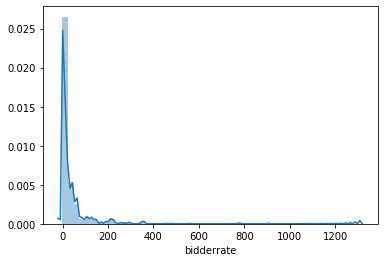

In [52]:
df=auction_data
sns.distplot(df['bidderrate'])

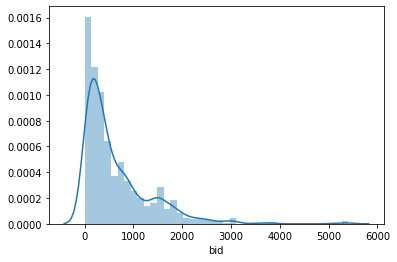

In [53]:
sns.distplot(df['bid'])

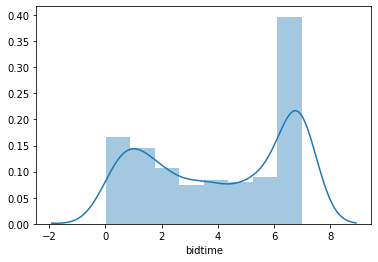

In [54]:
sns.distplot(df['bidtime'])

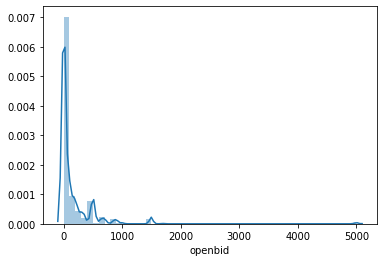

In [55]:
sns.distplot(df['openbid'])

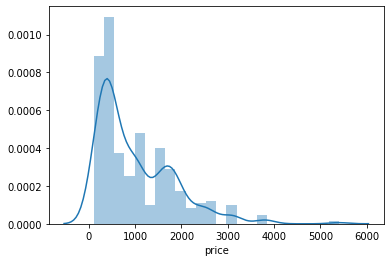

In [56]:
sns.distplot(df['price'])

We can see that almost all the features do not have a normal distribution. So for being able to use them for prediction we are going to convert them to a normal distribution.

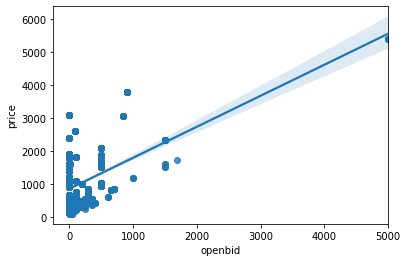

In [57]:
# Scatterplot
sns.regplot(x='openbid',y='price',data=df)

The openbid shows a highly linear correlation with price. The price increases as the openbid increases. This seems to a very important feature and we will use it in model building.

From this graph we can see that there are certain openbid for which we have many different prices, so we can say that openbid is a highly categorical feature. Some openbid's are more preferred by the sellers.

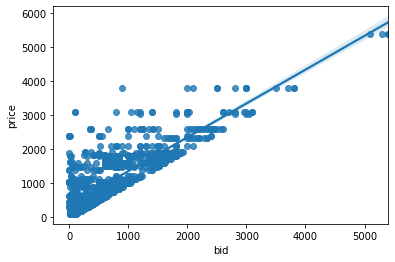

In [58]:
sns.regplot(x='bid',y='price',data=df)

Price should be linear with the proxy bid. if someone is putting a higher proxy bid then it means that the thing is more valuable. Our graph also supports this statement and a linear relationship can be seen. 'bid' is an important feature for price determination.

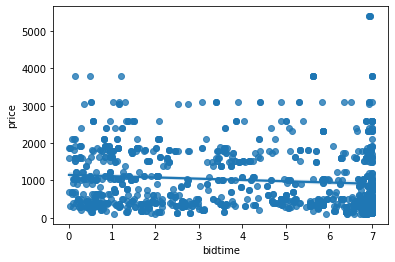

In [59]:
sns.regplot(x='bidtime',y='price',data=df)

It can be seen that price is almost constant with changing bidtime. So bidtime alone is not a good predictor to be used, and we can think of doing some feature engineering.

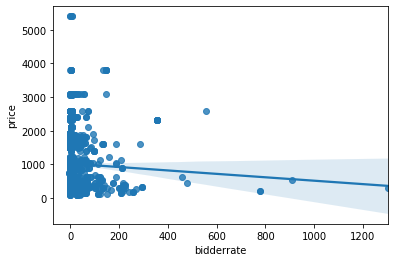

In [60]:
sns.regplot(x='bidderrate',y='price',data=df)

We can see there is not much relation between bidderrate and prices. So we should do some feature engineering with 'bidderrate'.

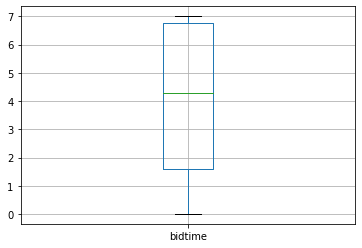

In [61]:
# Boxplots
df.boxplot(column=['bidtime'])

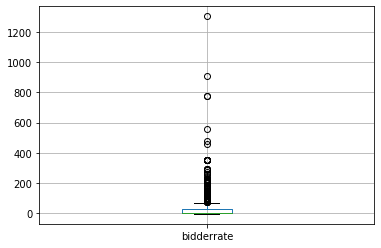

In [62]:
df.boxplot(column=['bidderrate'])

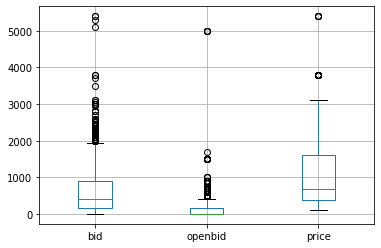

In [63]:
df.boxplot(column=['bid','openbid','price'])

We see that there are considerable amount of outliers in every variable except 'bidtime' and we should remove them.

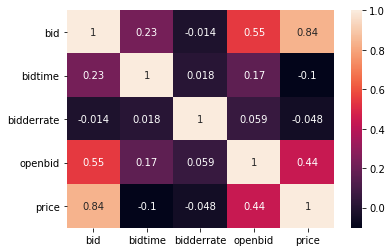

In [79]:
corr_col=df[['bid', 'bidtime', 'bidder', 'bidderrate', 'openbid','price']]
sns.heatmap(corr_col.corr(),annot=True)

In [393]:
# EXPLORATORY DATA ANALYSIS
auction_data.describe()

,auctionid,bid,bidtime,bidderrate,openbid,price,earthlink.ne,verizon.ne,aol.co,msn.co,...,altavis,disnow.co,calcsea.or,mcdata.co,bellsouth.ne,san.rr.co,dechert.co,yahoo.co,mindspring.co,user_len
count,1.213000e+03,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,1.644577e+09,647.652539,4.078951,31.807914,159.142852,1010.246076,0.003298,0.004946,0.050289,0.006595,...,0.003298,0.000824,0.004122,0.000824,0.001649,0.004946,0.000824,0.004122,0.003298,8.889530
std,3.566101e+06,701.003386,2.505148,79.112571,388.456626,832.676139,0.057354,0.070186,0.218630,0.080976,...,0.057354,0.028712,0.064097,0.028712,0.040589,0.070186,0.028712,0.064097,0.057354,2.805169
min,1.638844e+09,1.000000,0.007535,-4.000000,0.010000,103.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.641784e+09,161.000000,1.578866,1.000000,1.000000,374.990000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,1.644139e+09,400.000000,4.302025,5.000000,7.990000,680.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,1.647847e+09,895.000000,6.777083,30.000000,175.000000,1600.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
max,1.650986e+09,5400.000000,6.999965,1303.000000,5000.000000,5400.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000


In [75]:
# Removing outliers which are far above the mean
df=df[auction_data['bidderrate']<400]
df.shape

(1206, 8)

In [76]:
df=df[auction_data['bid']<4000]
df.shape

(1202, 8)

In [77]:
len(df[df['openbid']<2000]) # No more outliers are present 

1202

In [78]:
# Dropping the 'auction_id' column
df=df.drop('auctionid',1)

In [418]:
df.corr()

,auctionid,bid,bidtime,bidderrate,openbid,price,earthlink.ne,verizon.ne,aol.co,msn.co,...,altavis,disnow.co,calcsea.or,mcdata.co,bellsouth.ne,san.rr.co,dechert.co,yahoo.co,mindspring.co,user_len
auctionid,1.000000,0.076822,-0.014198,0.055943,0.007248,0.075352,-0.003671,-0.114566,-0.025450,-0.012382,...,0.059326,-0.010992,0.071629,-0.046081,-0.002779,-0.011001,-0.016907,-0.050289,-0.085403,0.085795
bid,0.076822,1.000000,0.218780,-0.000327,0.423217,0.818606,-0.010693,-0.038867,-0.001855,0.035874,...,-0.000635,-0.005707,-0.023459,-0.023214,0.000497,0.220649,0.017502,-0.041519,-0.040120,-0.080043
bidtime,-0.014198,0.218780,1.000000,0.010255,0.170795,-0.129658,-0.022537,0.078114,0.047179,-0.058980,...,0.055179,-0.040906,0.073073,0.019310,0.010475,0.044103,0.022269,-0.057628,0.067610,0.012224
bidderrate,0.055943,-0.000327,0.010255,1.000000,0.169046,-0.026945,0.210440,-0.012912,0.104688,-0.015498,...,-0.024633,-0.011760,-0.012995,0.002863,0.064584,-0.032853,0.047274,-0.025611,-0.006196,-0.135771
openbid,0.007248,0.423217,0.170795,0.169046,1.000000,0.331437,-0.025269,0.021292,0.018171,0.070586,...,-0.030266,0.037773,0.025232,-0.012565,-0.021384,0.197250,0.037879,-0.006451,-0.029418,-0.054601
price,0.075352,0.818606,-0.129658,-0.026945,0.331437,1.000000,-0.007418,-0.060411,-0.014592,0.063929,...,-0.023091,0.001004,-0.041550,-0.027972,-0.018371,0.249951,0.001004,-0.046384,-0.053903,-0.103759
earthlink.ne,-0.003671,-0.010693,-0.022537,0.210440,-0.025269,-0.007418,1.000000,-0.004093,-0.013361,-0.004730,...,-0.003339,-0.001667,-0.003735,-0.001667,-0.002359,-0.004093,-0.001667,-0.003735,-0.003339,-0.064957
verizon.ne,-0.114566,-0.038867,0.078114,-0.012912,0.021292,-0.060411,-0.004093,1.000000,-0.016377,-0.005798,...,-0.004093,-0.002044,-0.004578,-0.002044,-0.002892,-0.005017,-0.002044,-0.004578,-0.004093,0.002437
aol.co,-0.025450,-0.001855,0.047179,0.104688,0.018171,-0.014592,-0.013361,-0.016377,1.000000,-0.018926,...,-0.013361,-0.006672,-0.014944,-0.006672,-0.009439,-0.016377,-0.006672,-0.014944,-0.013361,-0.027177
msn.co,-0.012382,0.035874,-0.058980,-0.015498,0.070586,0.063929,-0.004730,-0.005798,-0.018926,1.000000,...,-0.004730,-0.002362,-0.005290,-0.002362,-0.003342,-0.005798,-0.002362,-0.005290,-0.004730,-0.048248


### Making model

In [423]:
x=corr_col.drop(['price','bidder'],axis=1)
y=corr_col.price.values

In [424]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

OLS (Ordinary least square) or linear regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the continuous dependent variable (feature) and one or more independent variables (features).

In [425]:
X_sm=sm.add_constant(x)
model=sm.OLS(y,X_sm)

We can use OLS Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

In [426]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     674.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:58:07   Log-Likelihood:                -8842.8
No. Observations:                1202   AIC:                         1.770e+04
Df Residuals:                    1195   BIC:                         1.774e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2023.4418   5121.238     -0.395      0.693   -1.21e+04    8024.177
auctionid   1.732e-06   3.12e-06      0.556      0.579   -4.38e-06    7.85e-06
bid            1.0770      0.019     56.233      0.000       1.039       1.115
bidtime     -102.8150      4.511    -22.792      0.000    -111.666     -93.964
bidderrate    -0.4684      0.212     -2.209      0.027      -0.884      -0.052
openbid        0.0540      0.046      1.185      0.236      -0.035       0.143
user_len      -9.4584      3.982     -2.375      0.018     -17.271      -1.646
==============================================================================
Omnibus:                      464.012   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2246.846
Skew:                           1.755   Prob(JB):                         0.00
Kurtosis:                       8.705   Cond. No.                     7.68e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 'bid' is a significant feature, and as bid increases by 1 price also increases by 1
- 'bidtime' is non significant as assumed
- 'bidderrate' is a significant which is conterintuitive and also price decreases as the bidderrate increases.
- 'openbid' is a non significant feature which is not is accordance with our assumption
- user name length is a significant feature which has the most impact on the price.

In pattern recognition, Multiple is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.

The evaluation matric which we are going to use further is mean absolute error which is the mean of absolute differnce between the predicted and actual value for each training data.

In [427]:
# Multiple linear regression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [428]:
np.mean(cross_val_score(lm,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-259.9060916533931

In [429]:
# The above score shows that we are on average off by rs 248 from the real value
# Lasso regression is another approach where it will normalize any bigger values

Lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [437]:
# Lasso regression
lm_l=Lasso(alpha=26.5)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-259.3974209320244

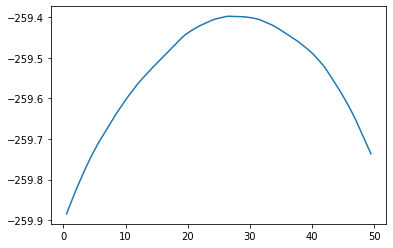

In [435]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/2)
    lml=Lasso(alpha=i/2)
    error.append(np.mean(cross_val_score(lml,x_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
plt.plot(alpha,error)

In [436]:
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

,alpha,error
52,26.5,-259.397421


In [438]:
# At alpha of 26.5 lasso regression gives slighty better model

Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

The model cross validation score is the highest among models evaluated so far.

We are further going to improve the random forest models by tuning it's parameters using grid search cv.

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. The optimal hyperparameter can be found using grid-search-CV which is going to use the cross validation score to choose the best parameter.

In [439]:
# Random forest regression
rf=RandomForestRegressor()
np.mean(cross_val_score(rf,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-162.76172916926274

In [440]:
# Tune models using grid search
parameters={'n_estimators':range(10,300,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

In [441]:
gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [442]:
gs.best_score_

-151.4412369088569

In [443]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [475]:
# test ensembles
tpred_lm=lm.predict(x_test)
tpred_lml=lm_l.predict(x_test)
tpred_rf=gs.best_estimator_.predict(x_test)

array([ 659.02116667,  655.98833333,  447.2335    , 1681.95      ,
        483.33333333,  871.31866667,  994.75      , 1737.67333333,
        202.5       ,  656.349     ,  834.23333333,  739.94666667,
        124.25      ,  669.9985    ,  418.05516667,  902.35983333,
       1200.53283333,  631.13783333, 1338.78883333, 1609.91666667,
        333.71583333, 1870.75      ,  393.24166667,  267.992     ,
        671.62766667,  367.98883333,  218.37783333,  760.00566667,
       1192.1545    ,  292.65583333,  421.31933333, 1577.13716667,
       1102.34966667,  391.54266667, 1721.25      ,  660.44266667,
        838.73333333, 1677.7       ,  448.08183333,  965.2       ,
       1267.1655    ,  627.43983333,  160.76      ,  492.84183333,
       2816.6       , 2484.54616667, 2485.55933333,  486.17433333,
        576.4735    ,  867.55616667,  153.26383333,  455.        ,
        342.87566667,  492.84183333,  458.94283333, 2380.93333333,
       2100.        ,  416.49883333,  775.6565    , 2289.2575 

In [445]:
mean_absolute_error(y_test,tpred_lm)

275.35076180906026

In [446]:
mean_absolute_error(y_test,tpred_lml)

274.19114611830935

In [447]:
mean_absolute_error(y_test,tpred_rf)

118.5506867219917

### Test data only for the competition

In [458]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/auction_data/test_set_label.csv')
test_data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid
0,1640550476,175.00,4.329410,simonho2001sg,8,1.0
1,1644343468,111.11,0.587164,tab999@msn.com,84,1.0
2,1639979107,103.50,6.999572,inyerdrms,2,5.0
3,1649718196,620.00,2.750775,kjr2306,24,1.0
4,1644077820,60.00,1.393611,chevysred,-1,1.0


In [459]:
test_data.shape

(337, 6)

In [460]:
test_data.isnull().any()

auctionid     False
bid           False
bidtime       False
bidder        False
bidderrate    False
openbid       False
dtype: bool

In [461]:
test_data.dtypes

auctionid       int64
bid           float64
bidtime       float64
bidder         object
bidderrate      int64
openbid       float64
dtype: object

In [462]:
# Removing email ids from bidder's name
test_data['bidder']=test_data['bidder'].apply(lambda x:x.split('@')[0] if '@' in x else x)
test_data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid
0,1640550476,175.00,4.329410,simonho2001sg,8,1.0
1,1644343468,111.11,0.587164,tab999,84,1.0
2,1639979107,103.50,6.999572,inyerdrms,2,5.0
3,1649718196,620.00,2.750775,kjr2306,24,1.0
4,1644077820,60.00,1.393611,chevysred,-1,1.0


In [463]:
test_data['user_len']=test_data['bidder'].apply(lambda x:len(x))
test_data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,user_len
0,1640550476,175.00,4.329410,simonho2001sg,8,1.0,13
1,1644343468,111.11,0.587164,tab999,84,1.0,6
2,1639979107,103.50,6.999572,inyerdrms,2,5.0,9
3,1649718196,620.00,2.750775,kjr2306,24,1.0,7
4,1644077820,60.00,1.393611,chevysred,-1,1.0,9


In [464]:
test_x=test_data[['auctionid', 'bid', 'bidtime', 'bidderrate', 'openbid','user_len']]

In [465]:
pred_lm=lm.predict(test_x)
pred_lml=lm_l.predict(test_x)
pred_rf=gs.best_estimator_.predict(test_x)

In [466]:
pred_rf=pd.DataFrame(pred_rf)

In [467]:
pred_rf.shape

(337, 1)

In [468]:
pred_rf.to_csv('pred_rf.csv')